In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import csv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.neighbors import KNeighborsClassifier

In [4]:
from sklearn.svm import LinearSVC, SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
import time as timer

In [5]:
import warnings
warnings.filterwarnings('ignore')
import os
import csv
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [6]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score
import time as timer
from sklearn.inspection import permutation_importance
import itertools
import seaborn as sns
from sklearn.svm import LinearSVC,SVC
from sklearn.multiclass import OneVsRestClassifier
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LassoCV,LogisticRegression,SGDClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier,StackingClassifier
from sklearn.feature_selection import chi2,SelectKBest,SelectFromModel,RFE,VarianceThreshold
from sklearn.metrics import confusion_matrix,precision_recall_curve,average_precision_score,roc_curve,auc,f1_score,accuracy_score,\
classification_report,multilabel_confusion_matrix, roc_auc_score,precision_recall_fscore_support
from sklearn.model_selection import cross_val_score,train_test_split,StratifiedKFold,GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler,LabelEncoder,LabelBinarizer
from scipy import interp
from itertools import cycle
plt.style.use('ggplot');
import sys
if ("/your/path/to/xelatex") not in sys.path:
    print('adding path') # I just add this to know if the path was present or not.
    sys.path.append("/your/path/to/xelatex")

adding path


In [7]:
from imblearn.over_sampling import SMOTE

In [8]:
from sklearn.metrics import precision_recall_curve

In [9]:
data = pd.read_stata("Anemia final writeup.dta")
data

,Age,Region,Residence,Altitude,Educational_status,Source_drinking_water,Toilet_facility,Religion,Family_size,Wealth_index,Current_contraceptive,Marital_status,Occupation,Media_exposure,Nutritional_status,Anemia_status
0,15-19,Oromia,Rural,High,Primary,Protected,Unimproved,Muslim,>=5,Poor,No,Unmarried,Not working,Yes,Normal,Not anemic
1,15-19,Oromia,Rural,High,No education,Unprotected,Unimproved,Muslim,>=5,Poor,No,Unmarried,Not working,No,Normal,Not anemic
2,15-19,Oromia,Rural,High,Primary,Protected,Unimproved,Muslim,>=5,Medium,No,Unmarried,Not working,No,Undernutrition,Not anemic
3,15-19,Oromia,Rural,High,Primary,Protected,Unimproved,Muslim,>=5,Medium,No,Unmarried,Not working,No,Undernutrition,Not anemic
4,15-19,Oromia,Rural,High,Primary,Protected,Unimproved,Muslim,>=5,Medium,No,Unmarried,Not working,No,Normal,Not anemic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5637,20-24,Dire Dawa,Urban,Low,Higher,Protected,Improved,Muslim,>=5,Rich,No,Unmarried,Working,Yes,Normal,Anemic
5638,20-24,Dire Dawa,Urban,Low,Secondary,Protected,Improved,Muslim,>=5,Rich,No,Unmarried,Not working,Yes,Over nutrition,Not anemic
5639,20-24,Addis Adaba,Urban,High,Primary,Protected,Unimproved,Orthodox,<5,Rich,No,Married,Working,Yes,Normal,Anemic
5640,20-24,Addis Adaba,Urban,High,Primary,Protected,Improved,Orthodox,<5,Rich,Yes,Unmarried,Working,Yes,Normal,Not anemic


In [10]:
data['Age'] = data['Age'].map({'15-19':0, '20-24':1})

In [11]:
data['Region'] = data['Region'].map({'Oromia':0, 'Addis Adaba':1, 'Tigray':2, 'SNNPR':3, 'Amhara':4, 'Somali':5, 
                'Afar':6, 'Benishangul':7, 'Dire Dawa':8, 'Gambela':9, 'Harari':10})

In [12]:
data['Residence'] = data['Residence'].map({'Urban':0, 'Rural':1})

In [13]:
data['Altitude'] = data['Altitude'].map({'Low':0, 'High':1})

In [14]:
data['Educational_status'] = data['Educational_status'].map({'No education':0, 'Primary':1, 'Secondary':2,'Higher':3 })

In [15]:
data['Source_drinking_water'] = data['Source_drinking_water'].map({'Protected':0, 'Unprotected':1})

In [16]:
data['Toilet_facility'] = data['Toilet_facility'].map({'Improved':0, 'Unimproved':1})

In [17]:
data['Religion'] = data['Religion'].map({'Orthodox':0, 'Muslim':1, 'Protestant':2,'Others':3})

In [18]:
data['Family_size'] = data['Family_size'].map({'<5':0, '>=5':1})

In [19]:
data['Wealth_index'] = data['Wealth_index'].map({'Rich':0, 'Medium':1, 'Poor':2})

In [20]:
data['Occupation'] = data['Occupation'].map({'Not working':0, 'Working':1})

In [21]:
data['Media_exposure'] = data['Media_exposure'].map({'Yes':0, 'No':1})

In [22]:
data['Marital_status'] = data['Marital_status'].map({'Unmarried':0, 'Married':1})

In [23]:
data['Nutritional_status'] = data['Nutritional_status'].map({'Undernutrition':0, 'Normal':1, 'Over nutrition':2})

In [24]:
data['Anemia_status'] = data['Anemia_status'].map({'Not anemic':0, 'Anemic':1})

In [25]:
data['Current_contraceptive'] = data['Current_contraceptive'].map({'No':0, 'Yes':1})

In [26]:
data

,Age,Region,Residence,Altitude,Educational_status,Source_drinking_water,Toilet_facility,Religion,Family_size,Wealth_index,Current_contraceptive,Marital_status,Occupation,Media_exposure,Nutritional_status,Anemia_status
0,0,0,1,1,1,0,1,1,1,2,0,0,0,0,1,0
1,0,0,1,1,0,1,1,1,1,2,0,0,0,1,1,0
2,0,0,1,1,1,0,1,1,1,1,0,0,0,1,0,0
3,0,0,1,1,1,0,1,1,1,1,0,0,0,1,0,0
4,0,0,1,1,1,0,1,1,1,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5637,1,8,0,0,3,0,0,1,1,0,0,0,1,0,1,1
5638,1,8,0,0,2,0,0,1,1,0,0,0,0,0,2,0
5639,1,1,0,1,1,0,1,0,0,0,0,1,1,0,1,1
5640,1,1,0,1,1,0,0,0,0,0,1,0,1,0,1,0


<Axes: >

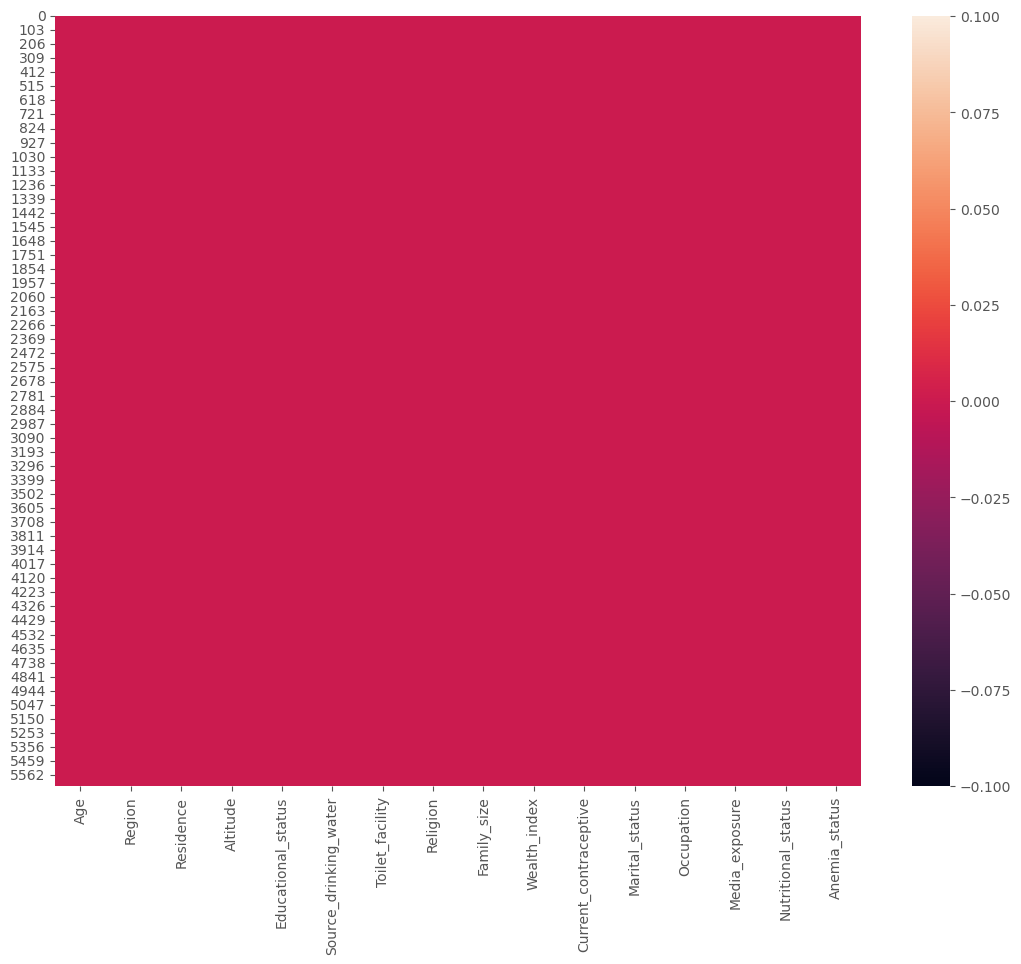

In [27]:
# Visualizing the missing values
plt.figure(figsize=(13, 10))
sns.heatmap(data.isna())

In [28]:
# Missing Values/Null Values Count
print(f'There are {data.isna().sum().sum()} missing values in the dataset\n')
data.isna().sum()

There are 0 missing values in the dataset



Age                      0
Region                   0
Residence                0
Altitude                 0
Educational_status       0
Source_drinking_water    0
Toilet_facility          0
Religion                 0
Family_size              0
Wealth_index             0
Current_contraceptive    0
Marital_status           0
Occupation               0
Media_exposure           0
Nutritional_status       0
Anemia_status            0
dtype: int64

In [29]:
data.dtypes

Age                      category
Region                   category
Residence                category
Altitude                 category
Educational_status       category
Source_drinking_water    category
Toilet_facility          category
Religion                 category
Family_size              category
Wealth_index             category
Current_contraceptive    category
Marital_status           category
Occupation               category
Media_exposure           category
Nutritional_status       category
Anemia_status            category
dtype: object

In [30]:
# Setting default theme for Seaborn visualisation
sns.set()

In [31]:
def colorise(val, threshold, equality = 'greater', font = None, absolute = False):
  '''Function to conditionally format the fonts:
  Inputs - value to compare, threshold value, equality (greater or lesser), font color and absolute (Boolean)'''
  
  if absolute == True:
    val = abs(val)
  if equality == 'lesser':
    threshold*= -1
    val*= -1
  if val > threshold and val != 1:
    return f'color : {font}; font-weight : bold'

<Axes: >

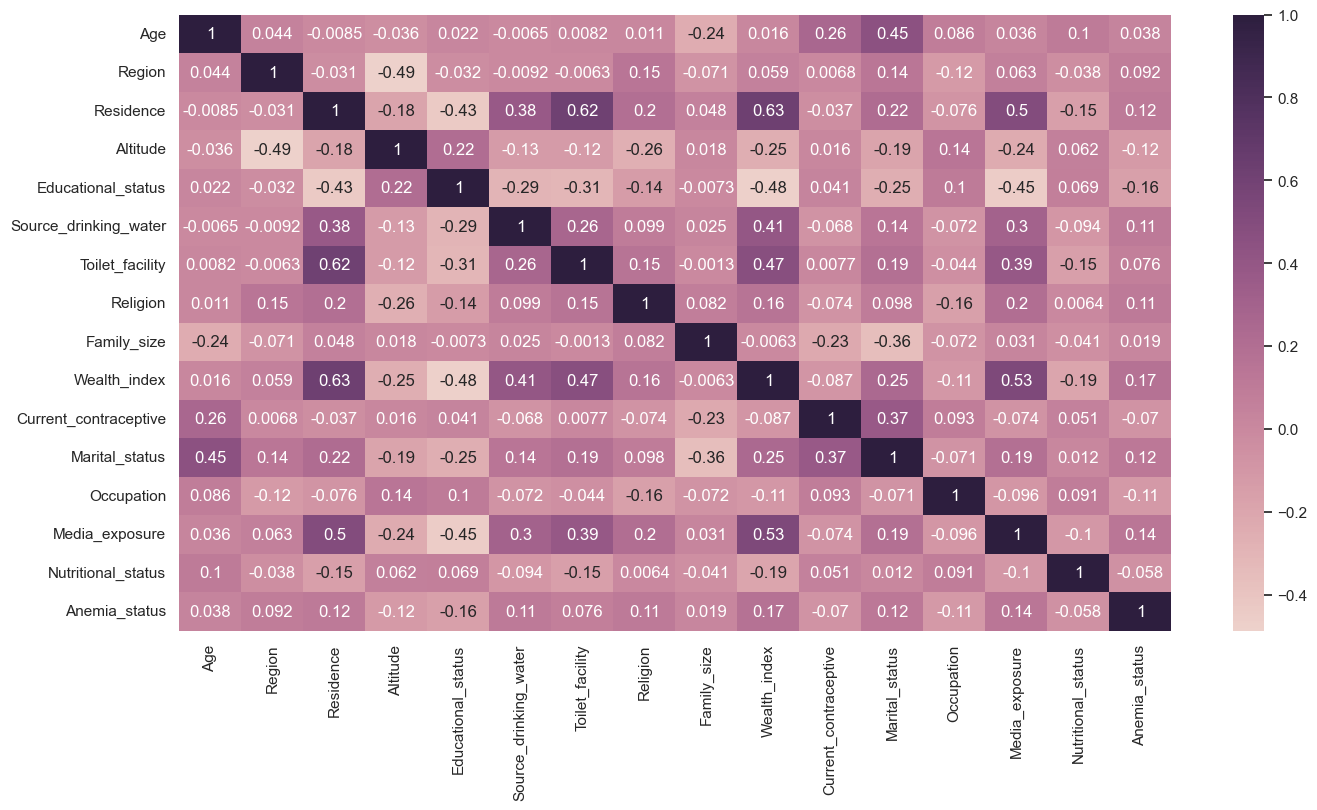

In [32]:
plt.figure(figsize = (16, 8))
sns.heatmap(data.corr(), annot = True, cmap = sns.cubehelix_palette(as_cmap=True))

In [33]:
columns=data.Anemia_status

In [34]:
data.corr()['Anemia_status']

Age                      0.038250
Region                   0.092041
Residence                0.116497
Altitude                -0.120076
Educational_status      -0.159877
Source_drinking_water    0.114371
Toilet_facility          0.075889
Religion                 0.106862
Family_size              0.019284
Wealth_index             0.174974
Current_contraceptive   -0.069555
Marital_status           0.122936
Occupation              -0.113785
Media_exposure           0.138597
Nutritional_status      -0.058234
Anemia_status            1.000000
Name: Anemia_status, dtype: float64

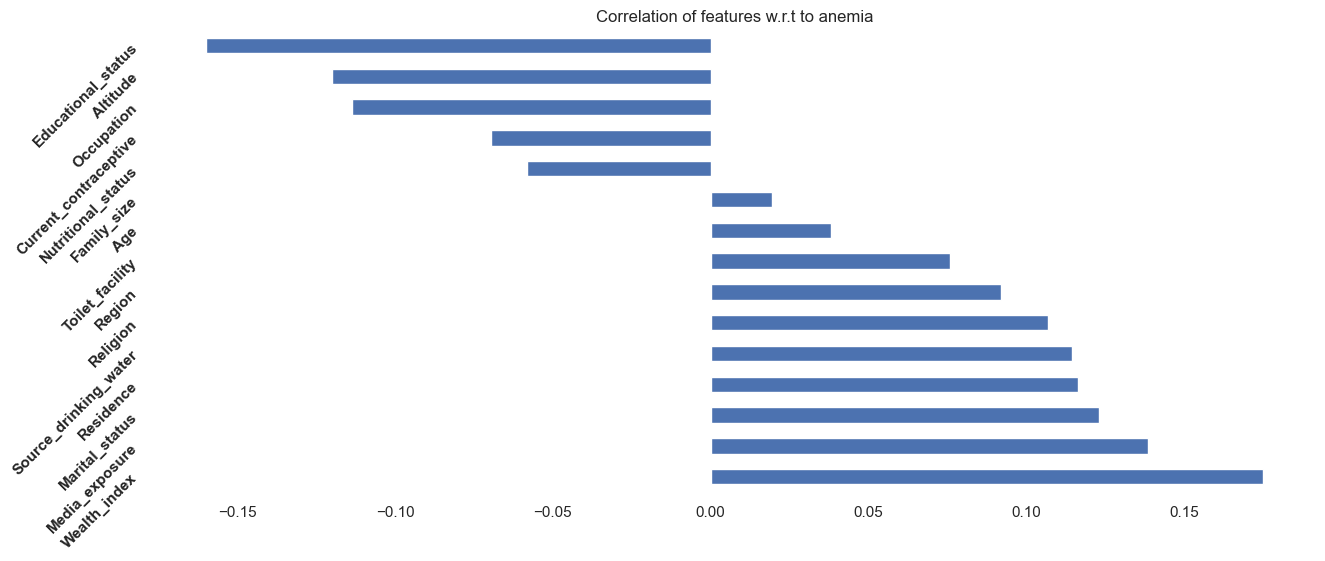

In [35]:
data.corr()['Anemia_status'][:-1].sort_values(ascending=False).plot(kind='barh', figsize = (15,6))
plt.yticks(rotation=45, weight='bold');
plt.title('Correlation of features w.r.t to anemia');

ax= plt.gca()
ax.set_facecolor("white")

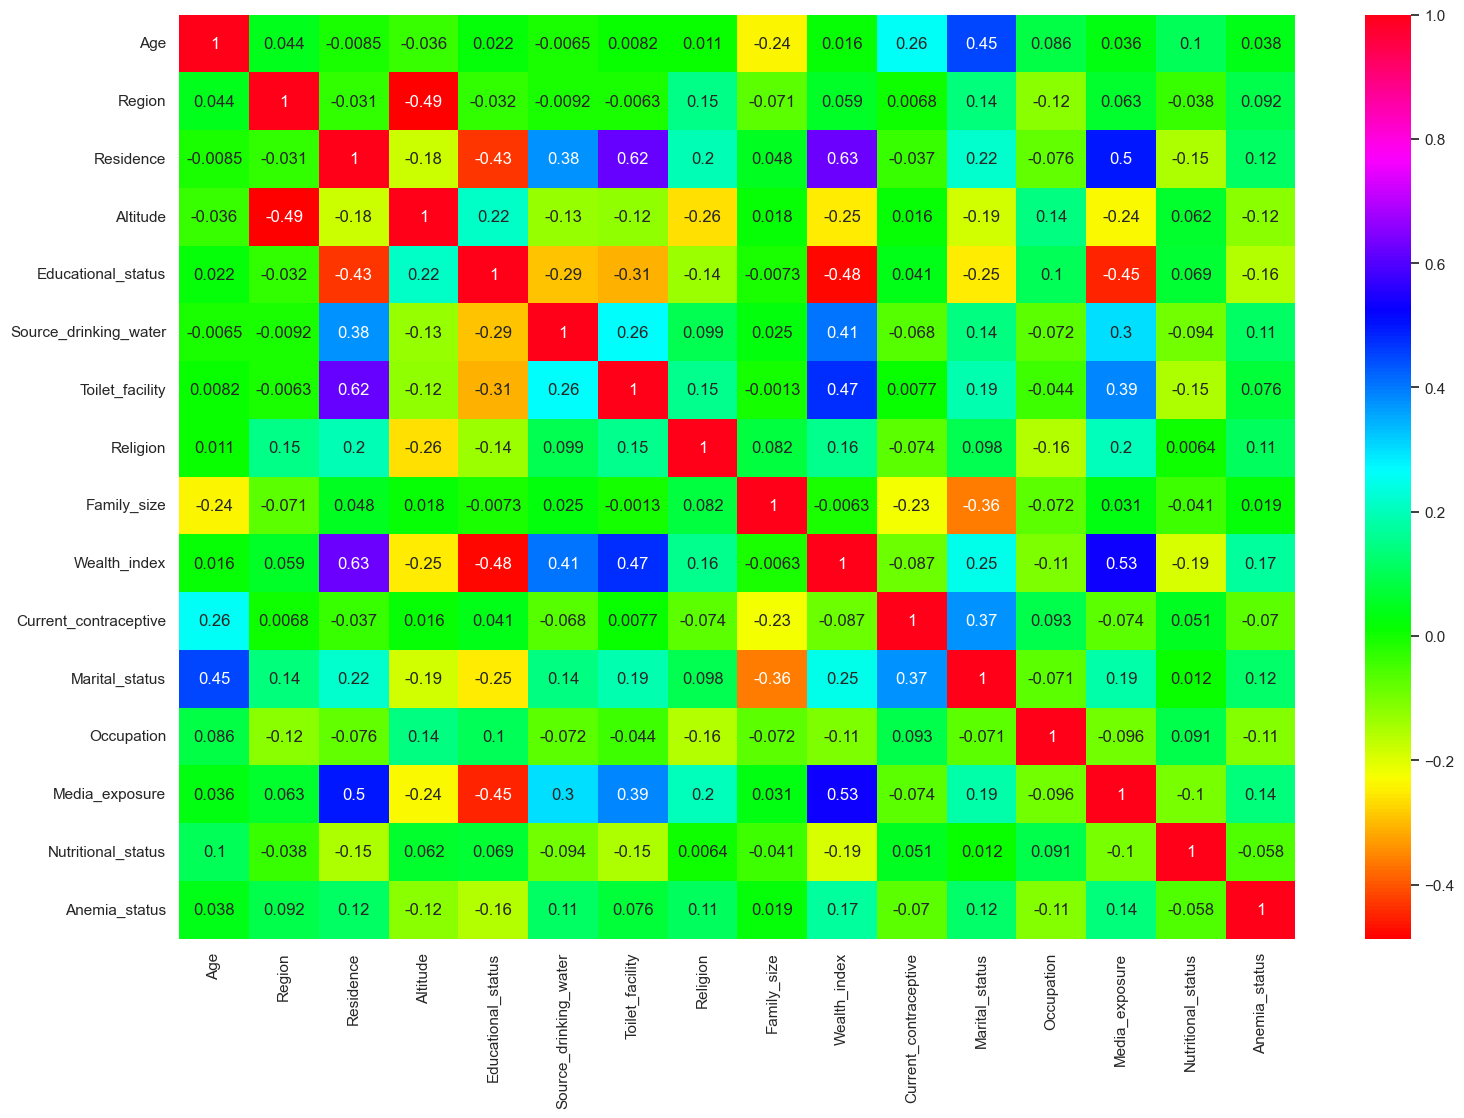

In [36]:
fig = plt.figure(figsize = (18,12))
ax = sns.heatmap(data.corr(), annot=True,cmap='hsv');

In [37]:
data.corr().style.applymap(colorise, threshold = 0.6, equality = 'greater', absolute = True, font = 'red')

,Age,Region,Residence,Altitude,Educational_status,Source_drinking_water,Toilet_facility,Religion,Family_size,Wealth_index,Current_contraceptive,Marital_status,Occupation,Media_exposure,Nutritional_status,Anemia_status
Age,1.000000,0.043990,-0.008473,-0.035954,0.022157,-0.006457,0.008168,0.010614,-0.238518,0.016302,0.259317,0.451512,0.085922,0.035503,0.103345,0.038250
Region,0.043990,1.000000,-0.031046,-0.486836,-0.031956,-0.009237,-0.006344,0.151256,-0.070883,0.058813,0.006832,0.136226,-0.119674,0.063154,-0.037591,0.092041
Residence,-0.008473,-0.031046,1.000000,-0.183857,-0.430077,0.376879,0.620122,0.198362,0.047862,0.625631,-0.036855,0.220189,-0.076395,0.497066,-0.150121,0.116497
Altitude,-0.035954,-0.486836,-0.183857,1.000000,0.215317,-0.128977,-0.123221,-0.260612,0.018255,-0.249226,0.016035,-0.187233,0.143210,-0.236194,0.062412,-0.120076
Educational_status,0.022157,-0.031956,-0.430077,0.215317,1.000000,-0.291730,-0.309918,-0.135935,-0.007317,-0.476403,0.041306,-0.253787,0.104302,-0.447397,0.068740,-0.159877
Source_drinking_water,-0.006457,-0.009237,0.376879,-0.128977,-0.291730,1.000000,0.264277,0.099020,0.025298,0.407524,-0.067857,0.144107,-0.071662,0.299071,-0.094308,0.114371
Toilet_facility,0.008168,-0.006344,0.620122,-0.123221,-0.309918,0.264277,1.000000,0.154327,-0.001319,0.473671,0.007713,0.188414,-0.044449,0.385065,-0.151667,0.075889
Religion,0.010614,0.151256,0.198362,-0.260612,-0.135935,0.099020,0.154327,1.000000,0.082243,0.155020,-0.074400,0.097723,-0.159452,0.203882,0.006391,0.106862
Family_size,-0.238518,-0.070883,0.047862,0.018255,-0.007317,0.025298,-0.001319,0.082243,1.000000,-0.006256,-0.225196,-0.362408,-0.071717,0.030643,-0.041191,0.019284
Wealth_index,0.016302,0.058813,0.625631,-0.249226,-0.476403,0.407524,0.473671,0.155020,-0.006256,1.000000,-0.086877,0.249894,-0.105135,0.531525,-0.191008,0.174974


# Feature-Engineering


In [38]:
columns=data.Anemia_status

In [39]:
print(f"Number of features: {data.shape}")
data.head(5)

Number of features: (5642, 16)


,Age,Region,Residence,Altitude,Educational_status,Source_drinking_water,Toilet_facility,Religion,Family_size,Wealth_index,Current_contraceptive,Marital_status,Occupation,Media_exposure,Nutritional_status,Anemia_status
0,0,0,1,1,1,0,1,1,1,2,0,0,0,0,1,0
1,0,0,1,1,0,1,1,1,1,2,0,0,0,1,1,0
2,0,0,1,1,1,0,1,1,1,1,0,0,0,1,0,0
3,0,0,1,1,1,0,1,1,1,1,0,0,0,1,0,0
4,0,0,1,1,1,0,1,1,1,1,0,0,0,1,1,0


In [40]:
# feature enginnering
print(f"Number of features: {data.shape}")
data.head(5)

Number of features: (5642, 16)


,Age,Region,Residence,Altitude,Educational_status,Source_drinking_water,Toilet_facility,Religion,Family_size,Wealth_index,Current_contraceptive,Marital_status,Occupation,Media_exposure,Nutritional_status,Anemia_status
0,0,0,1,1,1,0,1,1,1,2,0,0,0,0,1,0
1,0,0,1,1,0,1,1,1,1,2,0,0,0,1,1,0
2,0,0,1,1,1,0,1,1,1,1,0,0,0,1,0,0
3,0,0,1,1,1,0,1,1,1,1,0,0,0,1,0,0
4,0,0,1,1,1,0,1,1,1,1,0,0,0,1,1,0


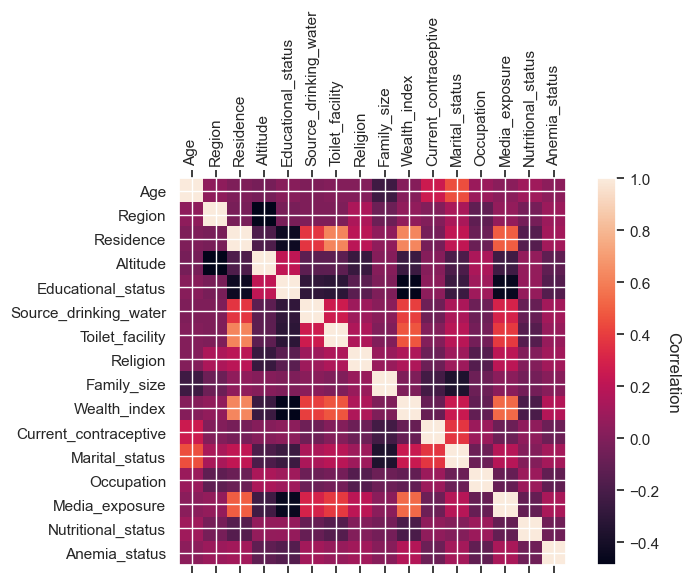

In [41]:
#  feature correlations
fig, ax = plt.subplots(figsize=(8,6))
im = ax.matshow(data.corr())
ax.set_xticks(np.arange(data.shape[1]))
ax.set_yticks(np.arange(data.shape[1]))
ax.set_xticklabels(data.columns,rotation=90)
ax.set_yticklabels(data.columns)
# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Correlation", rotation=-90, va="bottom", fontsize=12)
fig.tight_layout()
plt.show()

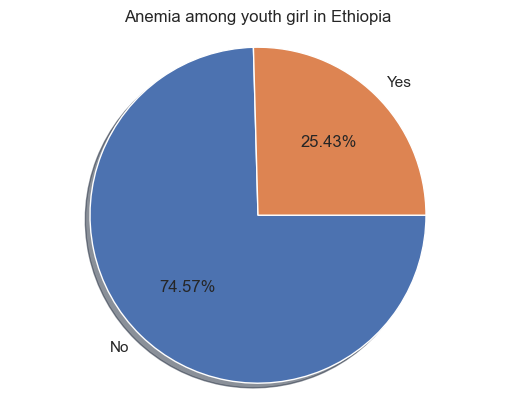

# samples associated with not Anemic: 4207
# samples associated with Anemic: 1435


In [42]:
class_occur = data['Anemia_status'].value_counts()
class_names = ['No','Yes']
fig, ax = plt.subplots()
ax.pie(class_occur, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=0, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Anemia among youth girl in Ethiopia')
plt.show()
print("# samples associated with not Anemic: {}".format(class_occur[0]))
print("# samples associated with Anemic: {}".format(class_occur[1]))

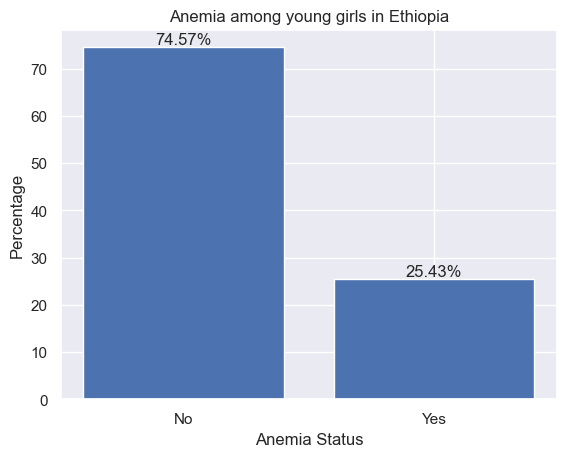

# samples associated with not Anemic: 4207
# samples associated with Anemic: 1435


In [44]:
# Count the occurrences of each class
class_occur = data['Anemia_status'].value_counts()

# Calculate the percentage of each class
class_percentages = class_occur / class_occur.sum() * 100

# Define class names for labeling the bar chart
class_names = ['No', 'Yes']

# Create a bar chart
fig, ax = plt.subplots()
ax.bar(class_names, class_percentages)

# Add labels to the bars
for i, v in enumerate(class_percentages):
    ax.text(i, v, f"{v:.2f}%", ha='center', va='bottom')

ax.set_title('Anemia among young girls in Ethiopia')
ax.set_xlabel('Anemia Status')
ax.set_ylabel('Percentage')

# Display the bar chart
plt.show()

# Print the number of samples associated with each class
print("# samples associated with not Anemic: {}".format(class_occur[0]))
print("# samples associated with Anemic: {}".format(class_occur[1]))

In [45]:
##Data Preprocessing/Feauture selection
X = data.drop('Anemia_status',axis=1)
y = data.Anemia_status
num_features_opt = 40   # the number of features that we need to choose as a result
num_features_max = 60   # the somewhat excessive number of features, which we will choose at each stage
features_best = []

In [46]:
# Checking for any missing values in the dataset
data.isna().sum()

Age                      0
Region                   0
Residence                0
Altitude                 0
Educational_status       0
Source_drinking_water    0
Toilet_facility          0
Religion                 0
Family_size              0
Wealth_index             0
Current_contraceptive    0
Marital_status           0
Occupation               0
Media_exposure           0
Nutritional_status       0
Anemia_status            0
dtype: int64

In [47]:
from imblearn.over_sampling import SMOTE

In [48]:
## Synthetic Minority Oversampling Technique (SMOTE)
smote = SMOTE(sampling_strategy='minority')

X, y = smote.fit_resample(data.loc[:,data.columns!='Anemia_status'], data['Anemia_status'])
print("Shape of X: {}".format(X.shape))
print("Shape of y: {}".format(y.shape))

Shape of X: (8414, 15)
Shape of y: (8414,)


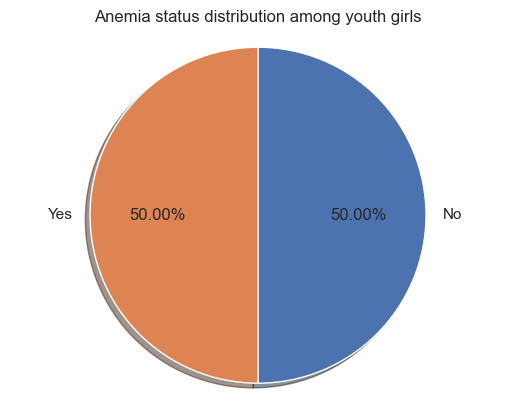

In [49]:
_, class_counts = np.unique(y, return_counts=True)
class_names = ['No','Yes']
fig, ax = plt.subplots()
ax.pie(class_counts, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=90, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Anemia status distribution among youth girls')
plt.show()

# I make the following code inactive for the time being, to run the next page effectively. But if you want the bar graph distrbution sfter SMOTE, you can use.

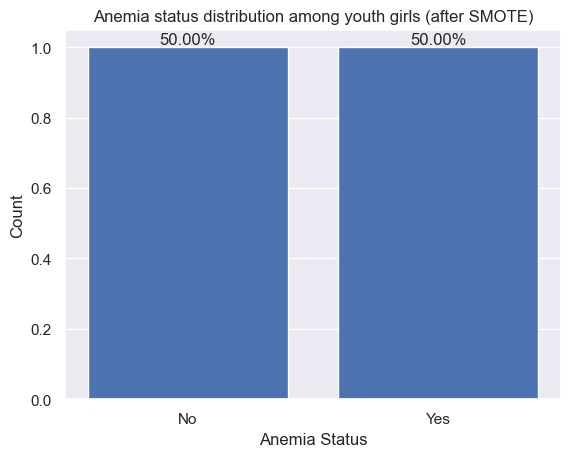

In [55]:
#import numpy as np
#import matplotlib.pyplot as plt
#from imblearn.over_sampling import SMOTE

#class_names = ['No', 'Yes']
#class_counts = np.array([60, 40])  # Example data, replace with your actual class counts

# Apply SMOTE
#smote = SMOTE()
#X = np.array(class_counts).reshape(-1, 1)
#y = np.array([0, 1])  # Assuming binary classes
#X_smote, y_smote = smote.fit_resample(X, y)
#class_counts_smote = np.bincount(y_smote)

#fig, ax = plt.subplots()
#ax.bar(class_names, class_counts_smote)

#ax.set_title('Anemia status distribution among youth girls (after SMOTE)')
#ax.set_xlabel('Anemia Status')
#ax.set_ylabel('Count')

# Calculate percentage values
#total_count = sum(class_counts_smote)
#percentages = class_counts_smote / total_count * 100

# Display percentage on each bar
#for i, count in enumerate(class_counts_smote):
   # ax.text(i, count, f'{percentages[i]:.2f}%', ha='center', va='bottom')

#plt.show()

In [50]:
# Data splitting
def split_train_valid_test(X,y,test_size=0.2,random_state=None):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size, random_state=random_state, stratify=y)
    X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train,test_size=test_size/(1-test_size), random_state=random_state, stratify=y_train)
    return X_train, X_valid, X_test, y_train, y_valid, y_test

X_train, X_valid, X_test, y_train, y_valid, y_test = split_train_valid_test(X,y,test_size=0.3,random_state=42)
_, train_counts = np.unique(y_train, return_counts=True)
_, valid_counts = np.unique(y_valid, return_counts=True)
_, test_counts = np.unique(y_test, return_counts=True)
print("[train] # class 0: {} | # class 1: {}".format(train_counts[0],train_counts[1]))
print("[valid] # class 0: {} | # class 1: {}".format(valid_counts[0],valid_counts[1]))
print("[test]  # class 0: {} | # class 1: {}".format(test_counts[0],test_counts[1]))

[train] # class 0: 1682 | # class 1: 1683
[valid] # class 0: 1262 | # class 1: 1262
[test]  # class 0: 1263 | # class 1: 1262


In [51]:
scaler = StandardScaler()
scaler = scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_valid_std = scaler.transform(X_valid)
X_test_std = scaler.transform(X_test)

In [52]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

In [53]:
def calc_sens_spec(y_true,y_pred):
    conf_matrix = confusion_matrix(y_true,y_pred)
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    # calculate the sensitivity
    sensitivity = TP / (TP + FN)    
    # calculate the specificity
    specificity = TN / (TN + FP)
    return sensitivity,specificity
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold

In [54]:
import time as timer

In [55]:
## SVM
start = timer.time()
svm_model = SVC(kernel='rbf',probability=True)
svm_model.fit(X_train_std, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_svm = svm_model.predict(X_test_std)
y_svm_prob = svm_model.predict_proba(X_test_std)

Finished training within 4.52 seconds


In [56]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score

Classification report for SVM: 
              precision    recall  f1-score   support

           0       0.65      0.67      0.66      1263
           1       0.66      0.64      0.65      1262

    accuracy                           0.66      2525
   macro avg       0.66      0.66      0.66      2525
weighted avg       0.66      0.66      0.66      2525

Confusion matrix for SVM: 
[[849 414]
 [450 812]]
Accuracy score for SVM: 0.66
Precision score for SVM: 0.66
Recall score for SVM: 0.64
F1 score for SVM: 0.65
Sensitivity score for SVM: 0.64
Specitivity score for SVM: 0.67
AUC score for SVM: 0.72


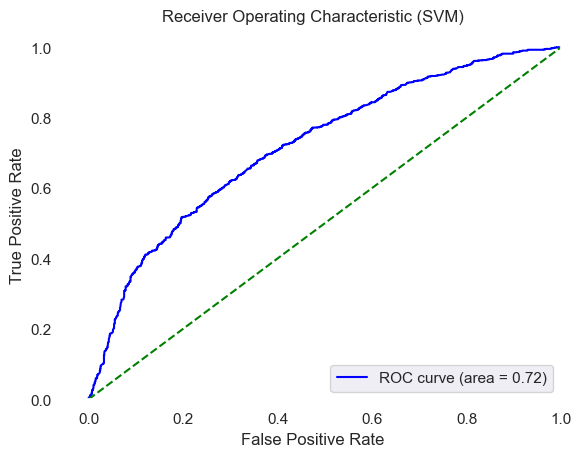

In [57]:
print("Classification report for SVM: \n{}".format(classification_report(y_test,y_svm)))
print("Confusion matrix for SVM: \n{}".format(confusion_matrix(y_test,y_svm)))
print("Accuracy score for SVM: {:.2f}".format(accuracy_score(y_test,y_svm)))
# calculate precision, recall, and f1 scores
prec_svm = precision_score(y_test,y_svm)
rec_svm = recall_score(y_test,y_svm)
f1_svm = f1_score(y_test,y_svm)
print("Precision score for SVM: {:.2f}".format(prec_svm))
print("Recall score for SVM: {:.2f}".format(rec_svm))
print("F1 score for SVM: {:.2f}".format(f1_svm))
# calculate sensitivity, specificity, and auc
sens_svm,spec_svm = calc_sens_spec(y_test,y_svm)
fpr, tpr, _ = roc_curve(y_test,  y_svm_prob[:,1])
auc_svm = roc_auc_score(y_test, y_svm_prob[:,1])
print("Sensitivity score for SVM: {:.2f}".format(sens_svm))
print("Specitivity score for SVM: {:.2f}".format(spec_svm))
print("AUC score for SVM: {:.2f}".format(auc_svm))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_svm)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (SVM)')
ax.legend(loc="lower right")
ax= plt.gca()
ax.set_facecolor("white")
plt.show()

In [58]:
## Gaussian Naive Bayes (GNB)
start = timer.time()
gnb_model = GaussianNB()
gnb_model.fit(X_train_std, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_gnb = gnb_model.predict(X_test_std)
y_gnb_prob = gnb_model.predict_proba(X_test_std)

Finished training within 0.01 seconds


Classification report for GNB: 
              precision    recall  f1-score   support

           0       0.61      0.59      0.60      1263
           1       0.61      0.63      0.62      1262

    accuracy                           0.61      2525
   macro avg       0.61      0.61      0.61      2525
weighted avg       0.61      0.61      0.61      2525

Confusion matrix for GNB: 
[[749 514]
 [472 790]]
Accuracy score for GNB: 0.61
Precision score for GNB: 0.61
Recall score for GNB: 0.63
F1 score for GNB: 0.62
Sensitivity score for GNB: 0.63
Specitivity score for GNB: 0.59
AUC score for GNB: 0.66


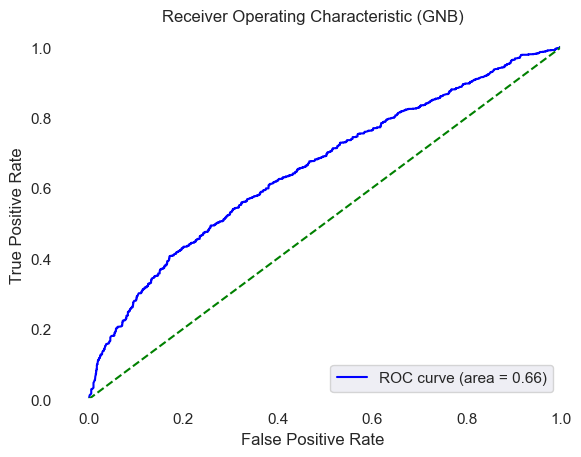

In [59]:
print("Classification report for GNB: \n{}".format(classification_report(y_test,y_gnb)))
print("Confusion matrix for GNB: \n{}".format(confusion_matrix(y_test,y_gnb)))
print("Accuracy score for GNB: {:.2f}".format(accuracy_score(y_test,y_gnb)))
# calculate precision, recall, and f1 scores
prec_gnb = precision_score(y_test,y_gnb)
rec_gnb = recall_score(y_test,y_gnb)
f1_gnb = f1_score(y_test,y_gnb)
print("Precision score for GNB: {:.2f}".format(prec_gnb))
print("Recall score for GNB: {:.2f}".format(rec_gnb))
print("F1 score for GNB: {:.2f}".format(f1_gnb))
# calculate sensitivity, specificity, and auc
sens_gnb,spec_gnb = calc_sens_spec(y_test,y_gnb)
fpr, tpr, _ = roc_curve(y_test,  y_gnb_prob[:,1])
auc_gnb = roc_auc_score(y_test, y_gnb_prob[:,1])
print("Sensitivity score for GNB: {:.2f}".format(sens_gnb))
print("Specitivity score for GNB: {:.2f}".format(spec_gnb))
print("AUC score for GNB: {:.2f}".format(auc_gnb))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_gnb)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (GNB)')
ax.legend(loc="lower right")
ax= plt.gca()
ax.set_facecolor("white")
plt.show()

In [60]:
##Logistic Regression (LR)
start = timer.time()
logit_model = LogisticRegression(solver='lbfgs', random_state=42)
logit_model.fit(X_train_std, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_logit = logit_model.predict(X_test_std)
y_logit_prob = logit_model.predict_proba(X_test_std)

Finished training within 1.12 seconds


Classification report for LR: 
              precision    recall  f1-score   support

           0       0.64      0.64      0.64      1263
           1       0.64      0.64      0.64      1262

    accuracy                           0.64      2525
   macro avg       0.64      0.64      0.64      2525
weighted avg       0.64      0.64      0.64      2525

Confusion matrix for LR: 
[[813 450]
 [455 807]]
Accuracy score for LR: 0.64
Precision score for LR: 0.64
Recall score for LR: 0.64
F1 score for LR: 0.64
Sensitivity score for LR: 0.64
Specitivity score for LR: 0.64
AUC score for LR: 0.67


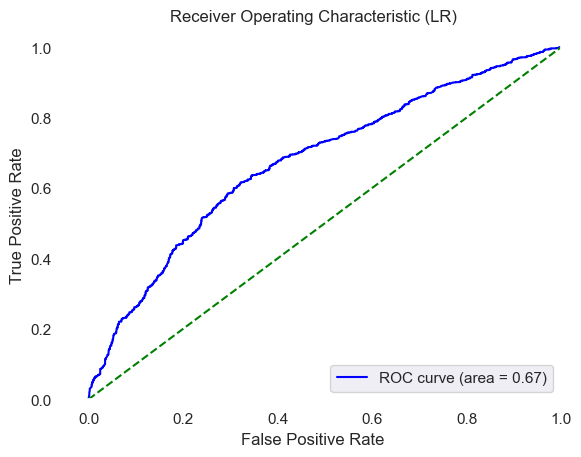

In [61]:
print("Classification report for LR: \n{}".format(classification_report(y_test,y_logit)))
print("Confusion matrix for LR: \n{}".format(confusion_matrix(y_test,y_logit)))
print("Accuracy score for LR: {:.2f}".format(accuracy_score(y_test,y_logit)))
# calculate precision, recall, and f1 scores
prec_logit = precision_score(y_test,y_logit)
rec_logit = recall_score(y_test,y_logit)
f1_logit = f1_score(y_test,y_logit)
print("Precision score for LR: {:.2f}".format(prec_logit))
print("Recall score for LR: {:.2f}".format(rec_logit))
print("F1 score for LR: {:.2f}".format(f1_logit))
# calculate sensitivity, specificity, and auc
sens_logit,spec_logit = calc_sens_spec(y_test,y_logit)
fpr, tpr, _ = roc_curve(y_test,  y_logit_prob[:,1])
auc_logit = roc_auc_score(y_test, y_logit_prob[:,1])
print("Sensitivity score for LR: {:.2f}".format(sens_logit))
print("Specitivity score for LR: {:.2f}".format(spec_logit))
print("AUC score for LR: {:.2f}".format(auc_logit))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_logit)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (LR)')
ax.legend(loc="lower right")

ax= plt.gca()
ax.set_facecolor("white")
plt.show()

In [62]:
##  DT
start = timer.time()
dtree_model = DecisionTreeClassifier(random_state=42)
dtree_model.fit(X_train_std, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_dtree = dtree_model.predict(X_test_std)
y_dtree_prob = dtree_model.predict_proba(X_test_std)

Finished training within 0.16 seconds


Classification report for DT: 
              precision    recall  f1-score   support

           0       0.69      0.65      0.67      1263
           1       0.67      0.71      0.69      1262

    accuracy                           0.68      2525
   macro avg       0.68      0.68      0.68      2525
weighted avg       0.68      0.68      0.68      2525

Confusion matrix for DT: 
[[821 442]
 [361 901]]
Accuracy score for DT: 0.68
Precision score for DT: 0.67
Recall score for DT: 0.71
F1 score for DT: 0.69
Sensitivity score for DT: 0.71
Specitivity score for DT: 0.65
AUC score for DT: 0.69


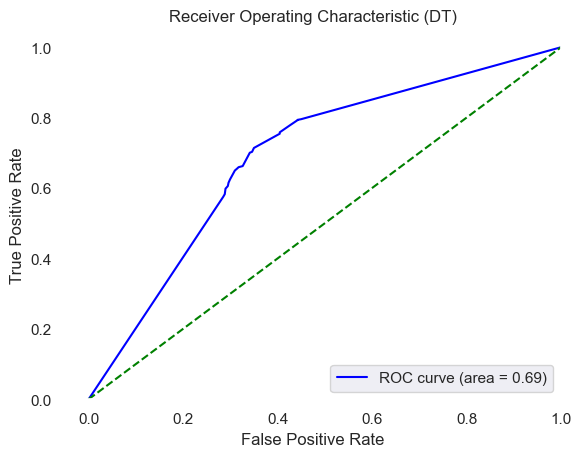

In [63]:
print("Classification report for DT: \n{}".format(classification_report(y_test,y_dtree)))
print("Confusion matrix for DT: \n{}".format(confusion_matrix(y_test,y_dtree)))
print("Accuracy score for DT: {:.2f}".format(accuracy_score(y_test,y_dtree)))
# calculate precision, recall, and f1 scores
prec_dtree = precision_score(y_test,y_dtree)
rec_dtree = recall_score(y_test,y_dtree)
f1_dtree = f1_score(y_test,y_dtree)
print("Precision score for DT: {:.2f}".format(prec_dtree))
print("Recall score for DT: {:.2f}".format(rec_dtree))
print("F1 score for DT: {:.2f}".format(f1_dtree))
# calculate sensitivity, specificity, and auc
sens_dtree,spec_dtree = calc_sens_spec(y_test,y_dtree)
fpr, tpr, _ = roc_curve(y_test,  y_dtree_prob[:,1])
auc_dtree = roc_auc_score(y_test, y_dtree_prob[:,1])
print("Sensitivity score for DT: {:.2f}".format(sens_dtree))
print("Specitivity score for DT: {:.2f}".format(spec_dtree))
print("AUC score for DT: {:.2f}".format(auc_dtree))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_dtree)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (DT)')
ax.legend(loc="lower right")
ax= plt.gca()
ax.set_facecolor("white")
plt.show()

In [64]:
## RF
start = timer.time()
ranfor_model = RandomForestClassifier(n_estimators=100, random_state=42)
ranfor_model.fit(X_train_std, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_ranfor = ranfor_model.predict(X_test_std)
y_ranfor_prob = ranfor_model.predict_proba(X_test_std)

Finished training within 0.82 seconds


Classification report for RF: 
              precision    recall  f1-score   support

           0       0.73      0.71      0.72      1263
           1       0.72      0.74      0.73      1262

    accuracy                           0.72      2525
   macro avg       0.72      0.72      0.72      2525
weighted avg       0.72      0.72      0.72      2525

Confusion matrix for RF: 
[[897 366]
 [332 930]]
Accuracy score for RF: 0.72
Precision score for RF: 0.72
Recall score for RF: 0.74
F1 score for RF: 0.73
Sensitivity score for RF: 0.74
Specitivity score for RF: 0.71
AUC score for RF: 0.78


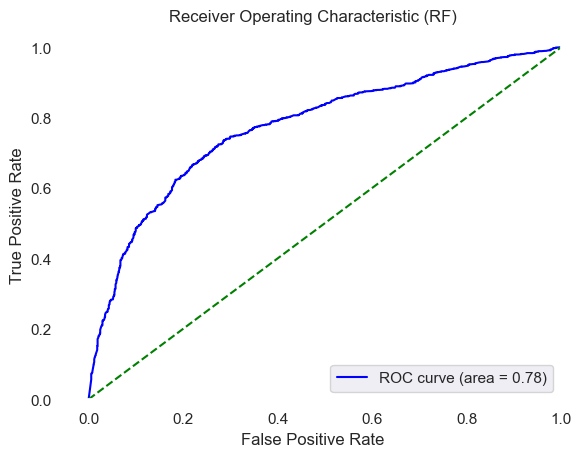

In [65]:
print("Classification report for RF: \n{}".format(classification_report(y_test,y_ranfor)))
print("Confusion matrix for RF: \n{}".format(confusion_matrix(y_test,y_ranfor)))
print("Accuracy score for RF: {:.2f}".format(accuracy_score(y_test,y_ranfor)))
# calculate precision, recall, and f1 scores
prec_ranfor = precision_score(y_test,y_ranfor)
rec_ranfor = recall_score(y_test,y_ranfor)
f1_ranfor = f1_score(y_test,y_ranfor)
print("Precision score for RF: {:.2f}".format(prec_ranfor))
print("Recall score for RF: {:.2f}".format(rec_ranfor))
print("F1 score for RF: {:.2f}".format(f1_ranfor))
# calculate sensitivity, specificity, and auc
sens_ranfor,spec_ranfor = calc_sens_spec(y_test,y_ranfor)
fpr, tpr, _ = roc_curve(y_test,  y_ranfor_prob[:,1])
auc_ranfor = roc_auc_score(y_test, y_ranfor_prob[:,1])
print("Sensitivity score for RF: {:.2f}".format(sens_ranfor))
print("Specitivity score for RF: {:.2f}".format(spec_ranfor))
print("AUC score for RF: {:.2f}".format(auc_ranfor))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_ranfor)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (RF)')
ax.legend(loc="lower right")
ax= plt.gca()
ax.set_facecolor("white")
plt.show()

ROC AUC score : 0.7741730064382717
95%CI: (0.7728204659460224, 0.7714110513870859, 0.7742298805049589)


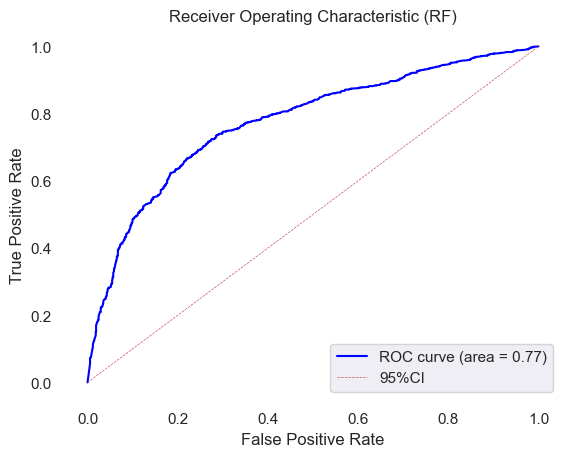

In [66]:
ranfor_model = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train,y_train)
score=roc_auc_score(y_test,ranfor_model.predict_proba(X_test)[:,1])
precision, recall, thresholds = precision_recall_curve(y_test, ranfor_model.predict_proba(X_test)[:,1])
auc_precision_recall = metrics.auc(recall, precision)
y_pred = ranfor_model.predict(X_test)

cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 100, random_state = 42)

ranfor_model_scores = cross_val_score(ranfor_model, X_train, y_train, cv=cv, scoring='roc_auc')

print('ROC AUC score :',score)

import scipy.stats
def mean_confidence_interval(df, confidence=0.95):
    a = 1.0 * np.array(df)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2, n-1)
    return m, m-h, m+h

mean_confidence_interval(ranfor_model_scores, confidence=0.95)
print('95%CI:',mean_confidence_interval (ranfor_model_scores, confidence=0.95))


fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % score)
ax.plot([0, 1], linestyle='--', lw=0.5, color='r', label='95%CI', alpha=.95) 


ax.set_title('Receiver Operating Characteristic (RF)')
ax.legend(loc="lower right")
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

ax= plt.gca()
ax.set_facecolor("white")
plt.show()

In [67]:
## LGBM
start = timer.time()
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_std, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_gb = gb_model.predict(X_test_std)
y_gb_prob = gb_model.predict_proba(X_test_std)

Finished training within 0.51 seconds


Classification report for gb: 
              precision    recall  f1-score   support

           0       0.64      0.70      0.67      1263
           1       0.67      0.61      0.64      1262

    accuracy                           0.66      2525
   macro avg       0.66      0.66      0.66      2525
weighted avg       0.66      0.66      0.66      2525

Confusion matrix for gb: 
[[885 378]
 [489 773]]
Accuracy score for gb: 0.66
Precision score for gb: 0.67
Recall score for gb: 0.61
F1 score for gb: 0.64
Sensitivity score for gb: 0.61
Specitivity score for gb: 0.70
AUC score for gb: 0.72


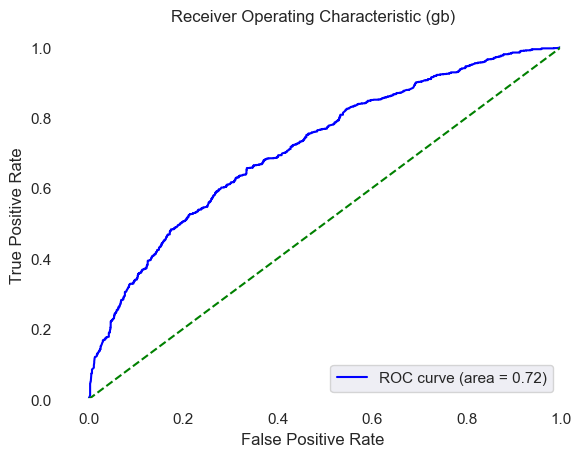

In [68]:
print("Classification report for gb: \n{}".format(classification_report(y_test,y_gb)))
print("Confusion matrix for gb: \n{}".format(confusion_matrix(y_test,y_gb)))
print("Accuracy score for gb: {:.2f}".format(accuracy_score(y_test,y_gb)))
# calculate precision, recall, and f1 scores
prec_gb = precision_score(y_test,y_gb)
rec_gb = recall_score(y_test,y_gb)
f1_gb = f1_score(y_test,y_gb)
print("Precision score for gb: {:.2f}".format(prec_gb))
print("Recall score for gb: {:.2f}".format(rec_gb))
print("F1 score for gb: {:.2f}".format(f1_gb))
# calculate sensitivity, specificity, and auc
sens_gb,spec_gb = calc_sens_spec(y_test,y_gb)
fpr, tpr, _ = roc_curve(y_test,  y_gb_prob[:,1])
auc_gb = roc_auc_score(y_test, y_gb_prob[:,1])
print("Sensitivity score for gb: {:.2f}".format(sens_gb))
print("Specitivity score for gb: {:.2f}".format(spec_gb))
print("AUC score for gb: {:.2f}".format(auc_gb))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_gb)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (gb)')
ax.legend(loc="lower right")
ax= plt.gca()
ax.set_facecolor("white")
plt.show()

In [70]:
start = timer.time()
xgb_model = XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train_std, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_xgb = xgb_model.predict(X_test_std)
y_xgb_prob = xgb_model.predict_proba(X_test_std)

Finished training within 0.77 seconds


Classification report for XGB: 
              precision    recall  f1-score   support

           0       0.71      0.70      0.71      1263
           1       0.71      0.72      0.71      1262

    accuracy                           0.71      2525
   macro avg       0.71      0.71      0.71      2525
weighted avg       0.71      0.71      0.71      2525

Confusion matrix for XGB: 
[[885 378]
 [358 904]]
Accuracy score for XGB: 0.71
Precision score for XGB: 0.71
Recall score for XGB: 0.72
F1 score for XGB: 0.71
Sensitivity score for XGB: 0.72
Specitivity score for XGB: 0.70
AUC score for XGB: 0.77


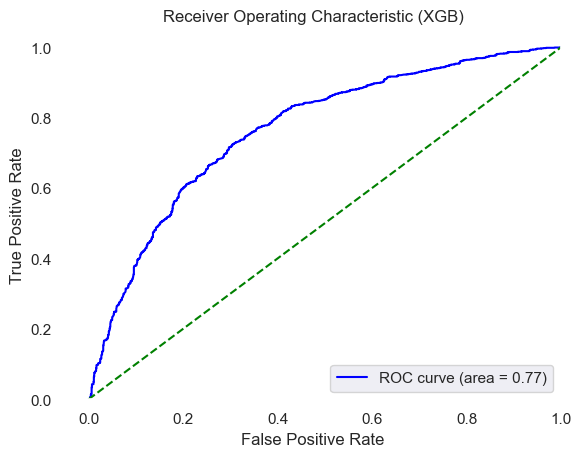

In [71]:
print("Classification report for XGB: \n{}".format(classification_report(y_test,y_xgb)))
print("Confusion matrix for XGB: \n{}".format(confusion_matrix(y_test,y_xgb)))
print("Accuracy score for XGB: {:.2f}".format(accuracy_score(y_test,y_xgb)))
# calculate precision, recall, and f1 scores
prec_xgb = precision_score(y_test,y_xgb)
rec_xgb = recall_score(y_test,y_xgb)
f1_xgb = f1_score(y_test,y_xgb)
print("Precision score for XGB: {:.2f}".format(prec_xgb))
print("Recall score for XGB: {:.2f}".format(rec_xgb))
print("F1 score for XGB: {:.2f}".format(f1_xgb))
# calculate sensitivity, specificity, and auc
sens_xgb,spec_xgb = calc_sens_spec(y_test,y_xgb)
fpr, tpr, _ = roc_curve(y_test,  y_xgb_prob[:,1])
auc_xgb = roc_auc_score(y_test, y_xgb_prob[:,1])
print("Sensitivity score for XGB: {:.2f}".format(sens_xgb))
print("Specitivity score for XGB: {:.2f}".format(spec_xgb))
print("AUC score for XGB: {:.2f}".format(auc_xgb))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_xgb)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (XGB)')
ax.legend(loc="lower right")
ax= plt.gca()
ax.set_facecolor("white")
plt.show()

In [72]:
## KNN
start = timer.time()
knn_model = KNeighborsClassifier(n_neighbors=15)
knn_model.fit(X_train_std, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_knn = knn_model.predict(X_test_std)
y_knn_prob = knn_model.predict_proba(X_test_std)

Finished training within 0.03 seconds


Classification report for knn: 
              precision    recall  f1-score   support

           0       0.65      0.59      0.62      1263
           1       0.63      0.69      0.65      1262

    accuracy                           0.64      2525
   macro avg       0.64      0.64      0.64      2525
weighted avg       0.64      0.64      0.64      2525

Confusion matrix for knn: 
[[746 517]
 [397 865]]
Accuracy score for knn: 0.64
Precision score for knn: 0.63
Recall score for knn: 0.69
F1 score for knn: 0.65
Sensitivity score for knn: 0.69
Specitivity score for knn: 0.59
AUC score for knn: 0.69


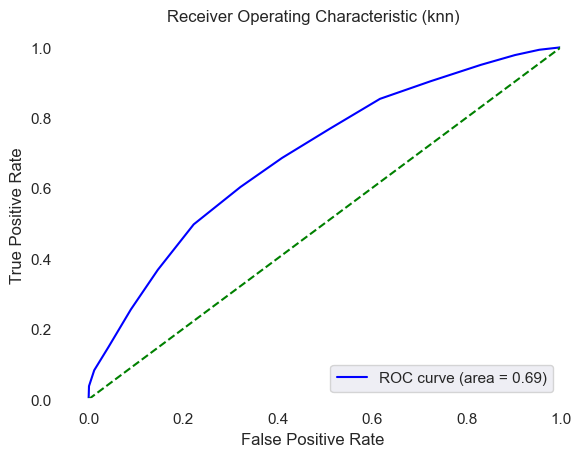

In [73]:
print("Classification report for knn: \n{}".format(classification_report(y_test,y_knn)))
print("Confusion matrix for knn: \n{}".format(confusion_matrix(y_test,y_knn)))
print("Accuracy score for knn: {:.2f}".format(accuracy_score(y_test,y_knn)))
# calculate precision, recall, and f1 scores
prec_knn = precision_score(y_test,y_knn)
rec_knn = recall_score(y_test,y_knn)
f1_knn = f1_score(y_test,y_knn)
print("Precision score for knn: {:.2f}".format(prec_knn))
print("Recall score for knn: {:.2f}".format(rec_knn))
print("F1 score for knn: {:.2f}".format(f1_knn))
# calculate sensitivity, specificity, and auc
sens_knn,spec_knn = calc_sens_spec(y_test,y_knn)
fpr, tpr, _ = roc_curve(y_test,  y_knn_prob[:,1])
auc_knn = roc_auc_score(y_test, y_knn_prob[:,1])
print("Sensitivity score for knn: {:.2f}".format(sens_knn))
print("Specitivity score for knn: {:.2f}".format(spec_knn))
print("AUC score for knn: {:.2f}".format(auc_knn))
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_knn)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (knn)')
ax.legend(loc="lower right")
ax= plt.gca()
ax.set_facecolor("white")
plt.show()

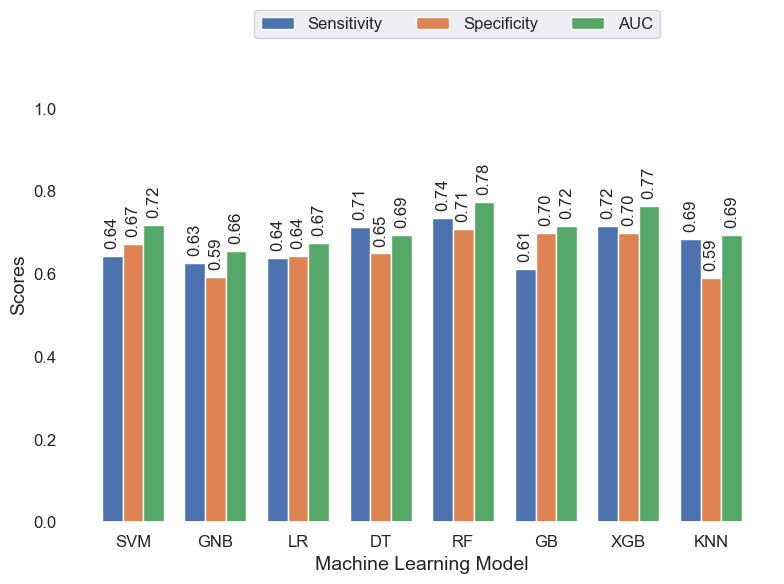

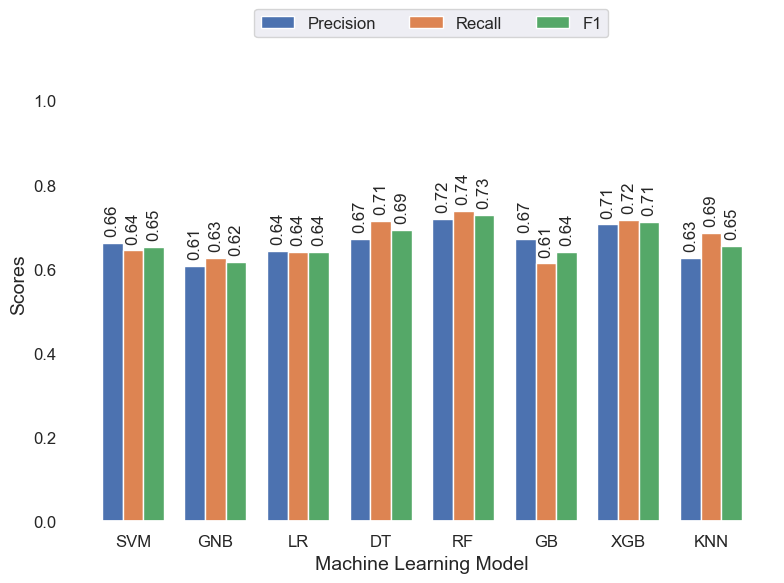

In [74]:
## Model performance
ml_names = ['SVM', 'GNB', 'LR', 'DT', 'RF', 'GB', 'XGB', 'KNN']
sens_all = [sens_svm, sens_gnb, sens_logit, sens_dtree, sens_ranfor, sens_gb, sens_xgb,sens_knn,]
spec_all = [spec_svm, spec_gnb, spec_logit, spec_dtree, spec_ranfor, spec_gb, spec_xgb,spec_knn]
auc_all = [auc_svm, auc_gnb, auc_logit, auc_dtree, auc_ranfor, auc_gb, auc_xgb,auc_knn]

prec_all = [prec_svm, prec_gnb, prec_logit, prec_dtree, prec_ranfor, prec_gb, prec_xgb,prec_knn]
rec_all = [rec_svm, rec_gnb, rec_logit, rec_dtree, rec_ranfor, rec_gb, rec_xgb,rec_knn]
f1_all = [f1_svm, f1_gnb, f1_logit, f1_dtree, f1_ranfor, f1_gb, f1_xgb, f1_knn]

def autolabel(bars):
    """Attach a text label above each bar in displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    fontsize=12,
                    rotation=90,
                    ha='center', va='bottom')

width = 0.25  # the width of the bars
r1 = np.arange(len(ml_names))  # the label locations
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
# plot sensitivity, specificity, and auc
fig, ax = plt.subplots(figsize=(8,6))
bar1 = ax.bar(r1, sens_all,  width, label='Sensitivity')
bar2 = ax.bar(r2, spec_all, width, label='Specificity')
bar3 = ax.bar(r3, auc_all, width, label='AUC')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylim([0,1.15])
ax.set_ylabel('Scores',fontsize=14)
#ax.set_title('Performance benchmark across ML models')
ax.set_xticks(r2)
ax.set_xticklabels(ml_names)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel("Machine Learning Model",fontsize=14)
ax.legend(loc='lower left',ncol=3,bbox_to_anchor=(0.25,1),fontsize=12)
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
fig.tight_layout()
fig.savefig("ml_benchmark_auc.pdf", bbox_inches='tight')
ax= plt.gca()
ax.set_facecolor("white")
plt.show()

# plot sensitivity, specificity, and auc
fig, ax = plt.subplots(figsize=(8,6))
bar1 = ax.bar(r1, prec_all, width, label='Precision')
bar2 = ax.bar(r2, rec_all, width, label='Recall')
bar3 = ax.bar(r3, f1_all, width, label='F1')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylim([0,1.13])
ax.set_ylabel('Scores',fontsize=14)
#ax.set_title('Performance benchmark across ML models')
ax.set_xticks(r2)
ax.set_xticklabels(ml_names)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel("Machine Learning Model",fontsize=14)
ax.legend(loc='lower left',ncol=3,bbox_to_anchor=(0.25,1),fontsize=12)
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
fig.tight_layout()
fig.savefig("ml_benchmark_f1.pdf", bbox_inches='tight')
ax= plt.gca()
ax.set_facecolor("white")
plt.show()

In [75]:
rec_all = [rec_svm, rec_gnb, rec_logit, rec_dtree, rec_ranfor, rec_gb, rec_xgb,rec_knn]

In [76]:
prec_all = [prec_svm, prec_gnb, prec_logit, prec_dtree, prec_ranfor, prec_gb, prec_xgb,prec_knn]

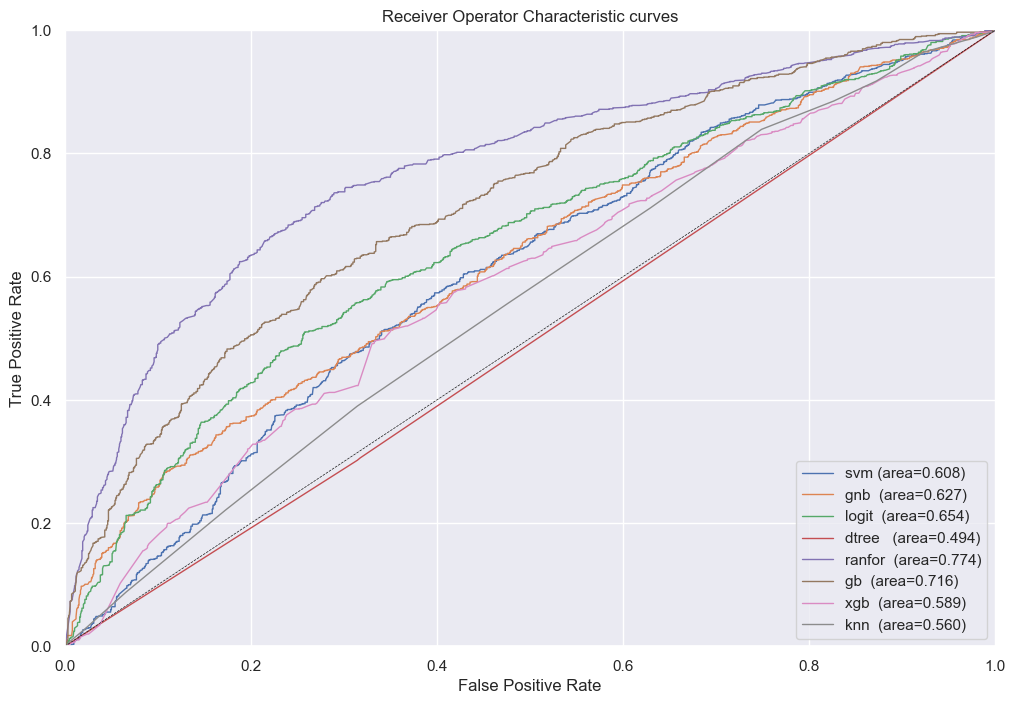

In [77]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))


roc_auc_plot(y_test,svm_model.predict_proba(X_test.values),label='svm',l='-')
roc_auc_plot(y_test,gnb_model.predict_proba(X_test.values),label='gnb ',l='-')
roc_auc_plot(y_test,logit_model.predict_proba(X_test.values),label='logit ',l='-')
roc_auc_plot(y_test,dtree_model.predict_proba(X_test.values),label='dtree  ',l='-')
roc_auc_plot(y_test,ranfor_model.predict_proba(X_test.values),label='ranfor ',l='-')
roc_auc_plot(y_test,gb_model.predict_proba(X_test.values),label='gb ',l='-')
roc_auc_plot(y_test,xgb_model.predict_proba(X_test.values),label='xgb ',l='-')
roc_auc_plot(y_test,knn_model.predict_proba(X_test.values),label='knn ',l='-')



ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()